# STA Final Project
## Impact of land-use change on runoff generation within the Panama Canal Watershed
#### December 13, 2016
#### Sidney Bush

## Introduction 

### Project Background

Since European development in the tropics, land-use and land-cover have changed dramatically with conversion of forests to subsistence farms and cattle pastures [1]. Human land-use decisions alter vegetation and soil structure that determine hydrologic flow paths and storage; however, the impacts of land-use change on water quality and quantity remain poorly understood. In many tropical regions anthropogenic water shortages are already common, and there is a high likelihood of further stress from longer dry seasons and more frequent, high intensity storms caused by accelerating climate change. Research in Panama, an area exemplary of land-use change in the tropics, presents two paradoxes regarding the connections between land-use, subsurface storage and runoff generation. First, in comparison to pasture, forested catchments have more prolonged discharge despite presumably larger losses to evapotranspiration, suggesting greater storage and drainable porosity in the subsurface [1]. Second, despite evidence of greater storage and porosity in forested catchments, overland flow has been documented in forested areas resulting in rapid, yet transient, hydrological connectivity between hillslopes and streams [4]. These combined findings suggest complex feedbacks among land-use, soil structure, infiltration, and runoff. Because these complex feedbacks are poorly understood, the goal of my proposed research is to quantify the impact of land-use practices on runoff generation mechanisms within the Panama Canal Watershed (PCW). 

I hypothesize: 
1. Land-use changes affect bioturbation of the shallow subsurface and consequently soil structure, resulting in transformation of subsurface flow paths and storage (i.e. mature forests create preferential flowpaths and increase storage); 

2. Due to the contraction and expansion of soil cracks in clay-rich tropical soils, water runoff pathways via overland flow versus subsurface flow are primarily dependent on antecedent soil moisture conditions and rainfall intensity; however, overland flow will decrease with increased bioturbation (i.e. overland flow will be less prevalent in mature forests than in pastures).

In [44]:
% INSERT Watershed images here
display('PanamaCanalWatershed'.png)
%display AguaSalud.png

Error: Unexpected MATLAB operator.


### Project Objectives

The above hypotheses will be tested by:
1. Design and implement a system to concurrently measure overland flow and infiltration (Difference Infiltrometer shown below)  
2. Using water chemistry to characterize water flowpaths and storage and 
3. Integrating plot and catchment scale data using numerical models. Current paradoxes will be addressed by comparing infiltration rates, overland flow, and subsurface flow path variability between pasture and forested catchments within the PCW. 

In [ ]:
% INSERT PHOTO OF DIFFERENCE INFILTROMETER HERE

## Methods

### Field Methods 

Fieldwork took place within paired catchments of the Agua Salud Project managed by the Smithsonian Tropical Research Institute (STRI) during the summer of 2016.  

### Data Analysis

Data analysis in this notebook deals exclusively with Project Objective 1, so only precipitation and runoff data from the Mature Forest and Pasture field sites will be dealt with here. The MATLAB kernel allows me to call scripts that I've already run in MATLAB, though full scripts will be loaded when necessary to show what work has been done (especially when tidying data). Scripts can be opened and viewed in the "Thesis_STA_Final" repository if desired.

Data sources: 
1. Precipitation data collected using a tipping bucket rain gauge at 5 minute resolution.
2. Runoff data collected using an Odyssey Level Logger (LL) at 10 minute resolution. 
3. Runoff data collected using a high-intensity tipping bucket (TB) rain gauge measuring flow off of a plot with a known area (See image of difference infiltrometer system above).
4. Precipitation data from 2016 from nearby field sites (used to cross reference my data). 

In [6]:
% Add folders and subfolders containing my data to path
addpath(genpath('PrecipRunoff'))

#### Visualize Precipitation Data

It is useful to know the size and frequency of events occurring at each of my field sites. This is easily accomplished by plotting some simple histograms of precipitation data for the pasture and the mature forest field sites. 

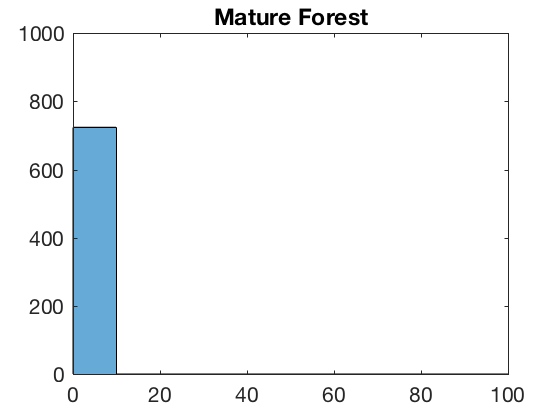

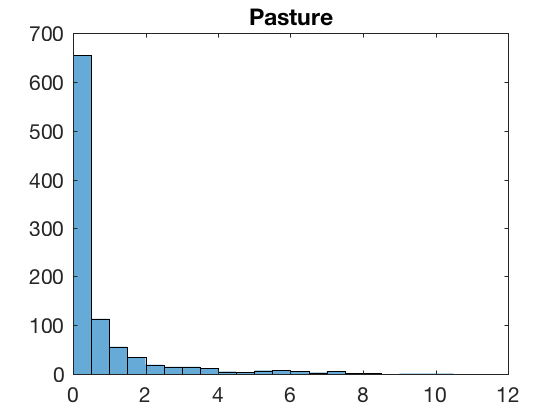

In [3]:
% Plot histograms for mature forest and pasture sites
PAS_MAT_Histograms

From this we can see that large events occur with much less frequency than smaller events. This makes sense, because small rain events occur multiple times throughout they day with much more frequency than long lasting or high intensity rain events. 

It is also useful to know the difference in total precipitation recorded throughout the field season. This can be acheived by plotting a graph of cumulative precipitation for both field sites. Precipitation values are summed: 

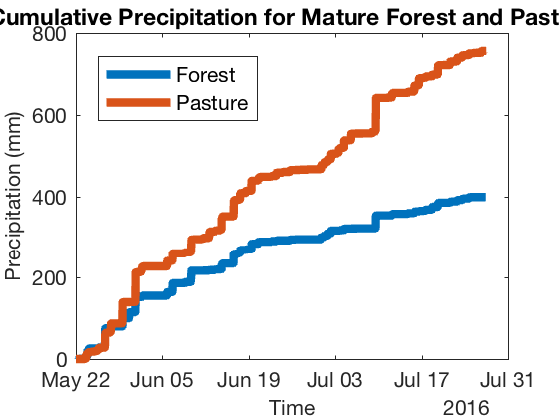

In [4]:
% Plot Cumulative Precip
CumulativePrecip

As we can see, the pasture received a greater amount of precipitation than the mature forest. This makes sense because the mature forest has a dense canopy, which decreases the amount of rainfall that reaches the tipping bucket rain gauge (as well as the land surface, as we will see later on). 

It is also important to cross-reference my precipitation values - both in the amount of rainfall received and in the timing of the rain events. Luckily, I have access to tipping bucket rainfall data for two sites that are (relatively) close to my field sites. Guabo Camp is a field site down the road from my pasture field site and Celestino Tower is a meteorological tower located at the closest field site equipped with a tipping bucket rain gauge to my mature forest field site. By plotting these on the same graph, I can make sure my rain gauges are recording rain events with some level of accuracy. This is of particular interest for my pasture field site because there was speculation during the summer that the tipping bucket rain gauge at the pasture was being overwhelmed by some of the high intensity rain events, which would result in a much lower volume of rainfall being recorded than was actually occurring.  

In [32]:
% First I need to clean up the Guabo Camp Precip data - these rain gauges use a different type of data logger
% that records the time when the level logger tips and adds up tips until the data logger is reset: 

In [33]:
%load PrecipRunoff/Investigating MyPrecipRunoffData/SyncGuaboCamptoMyPrecipData.m

In [ ]:
function [ synchronizedmm ] = SyncGuaboCamptoMyPrecipData( referencetimestamps, GCtiptimes )
%Sync GC data
%   Take in Guabo Camp Precip. data and return mm data that is synchronized to
%   the MAT/PAS precip. times

% for each referencetimestamp count the number of timestamps in GCtimes
% since the previous timestamp

synchronizedmm=zeros(length(referencetimestamps),1);
synchronizedmm(1)=length(GCtiptimes(GCtiptimes<referencetimestamps(1)));

for i=2: length(referencetimestamps)
    selectedtimestamps=(GCtiptimes>referencetimestamps(i-1)) & (GCtiptimes<referencetimestamps(i));
    synchronizedmm(i)=sum(selectedtimestamps);
    
    
end

end



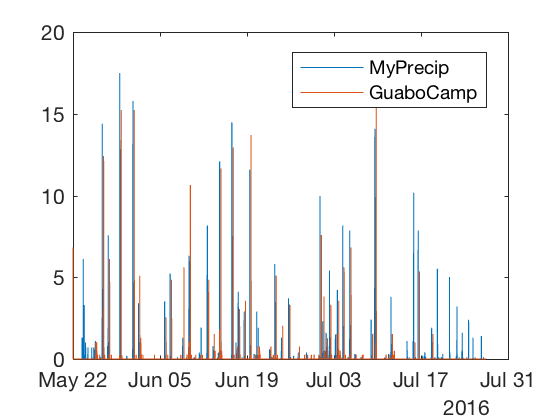

In [5]:
% Now I can graph this with my precip dataset 
% Nearby site precip data 2016 - Guabo Camp, Pasture
CompareGCpreciptoMyPrecipData


This graph gives me some peace of mind about the abilities and accuracies of my rainfall data from the pasture - rain events at Guabo Camp are not consistently larger or at different times than my data (though I noticed from working with the Guabo Camp data that the time stamps for this dataset are not on Panama time, and are instead 5 hours ahead of Panama time. This was consitent for the entire summer). 

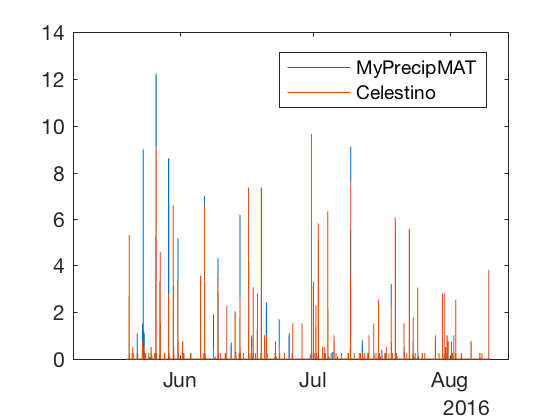

In [6]:
% Celestino Tower - Mature Forest
CompareCelestino_to_MyPrecipData

Likewise, Celestino rainfall data was not consistintely greater than my Mature Forest rainfall data. It does appear as though more rain events were recorded at Celestino Tower, however. This makes sense for two reasons: 1) Celestino Tower is not as close to the mature forest as Guabo Camp is to the pasture, so it makes sense that rainfall varies more and, 2) Celestino Tower is above canopy, so there is no interference from canopy cover in recording rain events. Still, this shows me that my precipitation data from the mature forest is not wildly different from nearby sites.

#### Tidy Data

Now that I have some confidence in my precipitation data for both field sites, I can start to look at precipitation - runoff dynamics between my two field sites. To do that, I need to first tidy my runoff datastes - from both the level logger and the tipping bucket rain gauge methods of measureing runoff. 

First, I need to process my Level Logger (LL) data. This script (which calls the function below it) does a few things; first, it converts the timestamps of each level logger (3 at MAT, 3 at PAS) to the same format. It also removes negative values from my dataset, since it is not possible for the volume of water that has run off of the land surface and into a covered five gallon bucket to decrease. Additionally, I noticed that often immediately following a negative recording, a positive value of the same magnitude was recorded. This was determined to be noise in the data - the people at Odyssey state that the level logger tends to "search" for data at times. So, values below a certain positive number (0.2) were removed from my dataset.    

In [20]:
%load PrecipRunoff/LL Negative Cleaning/ProcessAllRawLLData.m

In [ ]:
% Script Purpose: For each LL file, convert the multiple date formats into
% a single unified format. Then, convert 5 minute increments to 10

clear all;

% Check that we're in the right directory to start in. 
shouldBeDir = '/Users/sidneybush/Documents/Graduate School/Panama/Data - Summer 2016/PrecipRunOff';
if ~strcmp(pwd, shouldBeDir)
    warning(['Change to the directory: ' shouldBeDir ' in order to run.']); 
    return;
end

rawDataDir = 'RawData/';
cleanedDataDir = '/CleanedData/';

% Find only the CSV files in the data folder
allRawFiles = dir([rawDataDir '*.csv']);

% Create a structure that will store all the data we process
for i = 1:length(allRawFiles)
%    
end

% For each raw data file, do a couple of things
for i = 1:length(allRawFiles)
    % Process the individual file to correct date stamps
    [timeStamp, heightMM] = processLLFile([rawDataDir allRawFiles(i).name]);
    % Clean data by removing any negative values and any too-small positive
    % values
    minimumvalidchangeheight= 0.2;
    heightMM(heightMM < minimumvalidchangeheight)=0; 
    
    % Save the results to a structure that we can use later
    % Separate out just the filename, we'll use that below
    [~,name,~] = fileparts(allRawFiles(i).name);
    % Create a new field in the structure whose value is a structure
    % itself. That sub-structure contains the timestamp and heightmm
    allLL.(name) = struct('timeStamp',timeStamp, 'heightMM', heightMM); 
    
end

% Save our structure to a .mat file so we can load it elsewhere
saveDir = [shouldBeDir cleanedDataDir 'allLL'];
save(saveDir, 'allLL');

In [ ]:
% Script Purpose: For each LL file, convert the multiple date formats into
% a single unified format. Then, convert 5 minute increments to 10

clear all;

% Check that we're in the right directory to start in. 
shouldBeDir = '/Users/sidneybush/Documents/Graduate School/Panama/Data - Summer 2016/PrecipRunOff';
if ~strcmp(pwd, shouldBeDir)
    warning(['Change to the directory: ' shouldBeDir ' in order to run.']); 
    return;
end

rawDataDir = 'RawData/';
cleanedDataDir = '/CleanedData/';

% Find only the CSV files in the data folder
allRawFiles = dir([rawDataDir '*.csv']);

% Create a structure that will store all the data we process
for i = 1:length(allRawFiles)
%    
end

% For each raw data file, do a couple of things
for i = 1:length(allRawFiles)
    % Process the individual file to correct date stamps
    [timeStamp, heightMM] = processLLFile([rawDataDir allRawFiles(i).name]);
    % Clean data by removing any negative values and any too-small positive
    % values
    minimumvalidchangeheight= 0.2;
    heightMM(heightMM < minimumvalidchangeheight)=0; 
    
    % Save the results to a structure that we can use later
    % Separate out just the filename, we'll use that below
    [~,name,~] = fileparts(allRawFiles(i).name);
    % Create a new field in the structure whose value is a structure
    % itself. That sub-structure contains the timestamp and heightmm
    allLL.(name) = struct('timeStamp',timeStamp, 'heightMM', heightMM); 
    
end

% Save our structure to a .mat file so we can load it elsewhere
saveDir = [shouldBeDir cleanedDataDir 'allLL'];
save(saveDir, 'allLL');

In [17]:
%load PrecipRunoff/LL Negative Cleaning/processLLFile.m

In [ ]:
% File Purpose: Take in a level logger .csv file with multiple columns. Convert the
% multiple date formats into one DateTime vector, and extract the heightMM
% vector

function [timeStamp, heightMM] = processLLFile(fileToProcess)
% Import the csv file, start reading on second row to headers
rawData = readtable(fileToProcess);
% Extract the date and time variables into cell arrays so we can process
% them 
date = rawData{:,3};
time = rawData{:,4};
% Stich each date and time together into one string
combined = strcat(date, '-', time);
% Turn each string into a datetime object
timeStamp = datetime(combined,'InputFormat', 'dd/MM/yyyy-HH:mm:ss');

% Extract the height in mm
heightMM = rawData{:,5};

end

Next, the tipping bucket data need to be cleaned. First, because the level logger data has a resolution of ten minutes, the tipping bucket data needs to be converted to ten minute resolution in order to plot these data sets together: 

In [23]:
%load PrecipRunoff/TippingBucketCleaning/convert_tb10.m

In [ ]:
function [ tentime, tenvalue ] = convert_tb10( time, value )
%converts tipping bucket runoff data to ten minute resolution
% no

% If there are an odd number of points, we won't be able to add the last 5
% minute point to any other point to get 10 minutes of data. So cut off the
% last point in this case. 
isodd= mod(length(time),2);
if isodd
   time(end)=[];
end
tentime =[];
tenvalue = [];

for i= 1:2:length(time)
%   Totals can simply be added
    tenvalue = [tenvalue; value(i) + value(i+1)];
%   Just take the first of the two times
    tentime = [tentime; time(i)];
end

end

Tipping buckets record volume in mm, which is adjusted for the area of the tipping bucket rain gauge orifice. Because I'm measuring runoff as precip hits a plot on the ground surface, the volume per each tip recorded by the tipping bucket needs to be adjusted for the volume of the plot on the ground surface: 

In [24]:
%load PrecipRunoff/TippingBucketCleaning/AdjustForPlotArea.m

In [ ]:
% We want to know what depth of rainfall corresponds to one tip of the
% tipping bucket. The area of the plot is different than the area of the tipping bucket
% opening. So, we need to scale our measurements to get the correct depth
% in mm. 

% Set up our assumptions/dimensions (mm). 
areaPlot = 156850;
diamTippingBucket = 154; 
areaTippingBucket = pi * (diamTippingBucket/2)^2; 
depthTippingBucket = 0.2;

% We know that the volume of water in each tip of the bucket is constant,
% no matter whether you collect that over a big area (the plot) or a small
% area (the tipping bucket opening). So we calculate that volume: 
volume = areaTippingBucket * depthTippingBucket; 
% And then determine what depth of rainfall would fill one tips volume when
% collected over the area of the entire plot: 
depthPlot = volume/areaPlot; 

display(['The depth of rain across the whole plot for one tip is: ' num2str(depthPlot)]);

% Find a constant that we can multiply the tipping bucket depth by to get
% the correct depth. We know that a depth of 0.2 for the tipping bucket
% should correspond to a depth of "depthPlot". 
% depthTippingBucket * conversionFactor = depthPlot. 
conversionFactor = depthPlot / depthTippingBucket; 

display(['We should multiply the tipping bucket depth by: ' num2str(conversionFactor) ' to get the correct depth for the plot.']);


Finally, I need to also convert my precipitation data to ten minute resolution, since this is the greatest resolution of my level logger runoff data: 

In [9]:
%load PrecipRunoff/Convert_Rainfall_MAT_PAS_To_10min.m

In [ ]:
%% Import MAT Precip Data

[TimeStamp,Precip,RainfallRate] = importMATprecip('MAT_Precip_May22-July27_2016 - Sheet1.csv',2, 19120);

% If there are an odd number of points, we won't be able to add the last 5
% minute point to any other point to get 10 minutes of data. So cut off the
% last point in this case. 
isodd= mod(length(TimeStamp),2);
if isodd
    TimeStamp(end)=[];
end

tenminuterate_MAT=[];
tenminutetotal_MAT=[];
tenminutetime_MAT=[];

for i= 1:2:length(TimeStamp)
%   Divide rainfall rate by 2 after adding, because we're now doing the
%   rate over 10 instead of 5 minutes
    tenminuterate_MAT = [tenminuterate_MAT; (RainfallRate(i) + RainfallRate(i+1))/2];
%   Totals can simply be added
    tenminutetotal_MAT = [tenminutetotal_MAT; Precip(i) + Precip(i+1)];
%   Just take the first of the two timestamps
    tenminutetime_MAT = [tenminutetime_MAT; TimeStamp(i)];
end

% Timestamp for precip is an hour later than it should be, so subtract an
% hour from it. 
% tenminutetime_MAT = tenminutetime_MAT - hours(1);
%% Import PAS Precip Data

[TimeStampPAS,PrecipPAS,RainfallRatePAS] = importPASPrecip2('PAS_Precip_May22-July27_2016 - Sheet1.csv',2, 19153);

% If there are an odd number of points, we won't be able to add the last 5
% minute point to any other point to get 10 minutes of data. So cut off the
% last point in this case. 
isodd= mod(length(TimeStampPAS),2);
if isodd
    TimeStampPAS(end)=[];
end

tenminuterate_PAS=[];
tenminutetotal_PAS=[];
tenminutetime_PAS=[];

for i= 1:2:length(TimeStampPAS)
%   Divide rainfall rate by 2 after adding, because we're now doing the
%   rate over 10 instead of 5 minutes
    tenminuterate_PAS = [tenminuterate_PAS; (RainfallRatePAS(i) + RainfallRatePAS(i+1))/2];
    tenminutetotal_PAS = [tenminutetotal_PAS; PrecipPAS(i) + PrecipPAS(i+1)];
    tenminutetime_PAS = [tenminutetime_PAS; TimeStampPAS(i)];
end

% Timestamp for precip is an hour later than it should be, so subtract an
% hour from it. 
% tenminutetime_PAS = tenminutetime_PAS - hours(1);

Half a semester later and I can now plot all of my data together! 

#### Data Visualization 

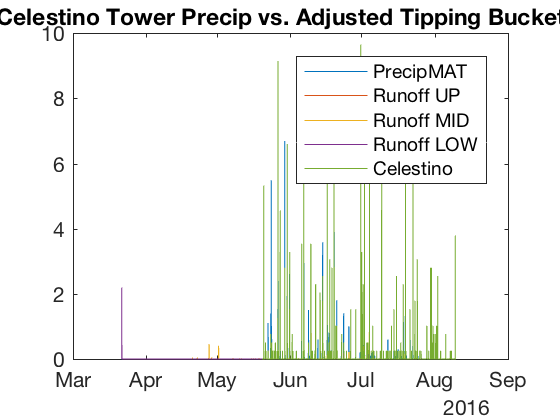

In [7]:
% Let's just throw it all on there and see what happens: 
% here's my precip data, the Celestino Tower Precip data and Runoff data from the tipping bucket 
% rain gauge for the upper, middle and lower sites along my mature forest hillslope.

% Note that runoff starts before precip, because the runoff equipment was installed in March 2016,
% while precip data were not installed until late May 2016

PlotTippingBucketRunoff_w_Precip_MAT

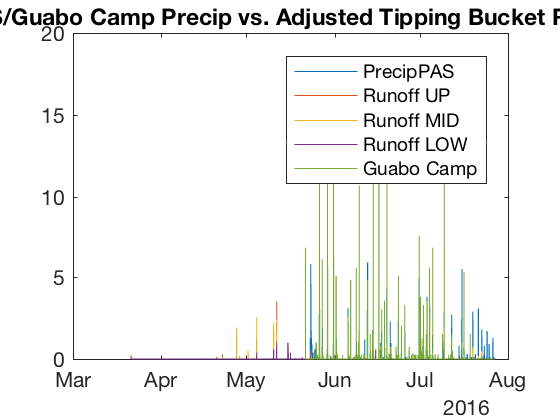

In [8]:
PlotTippingBucketRunoff_w_Precip_PAS

Compare this to a graph of my precip data plotted with the level logger runoff data (it would be too confusing to put the level logger and tipping bucket data on the same graph at this stage - there would be 6 different lines following  each rain event. In the future, it would be useful to average the upper, middle and lower runoff values for level logger and tipping bucket measurements separately, but for now I'm still in the investigative portion of my data analysis, and I want to see exactly what's happening with both data sets individually). 

In [ ]:
% Precip and Level Logger Runoff for Summer 2016 - Raw

In [10]:
%% Import Level Logger Data
% Forest Upper, Middle LL Data
cleanedDataFileName = 'LL Negative Cleaning/CleanedData/allLL.mat';
% This will load the allLL structure here so we can use it
load(cleanedDataFileName);

%% Import Rain Gauge Data
% Forest and Pasture
Convert_Rainfall_MAT_PAS_To_10min;

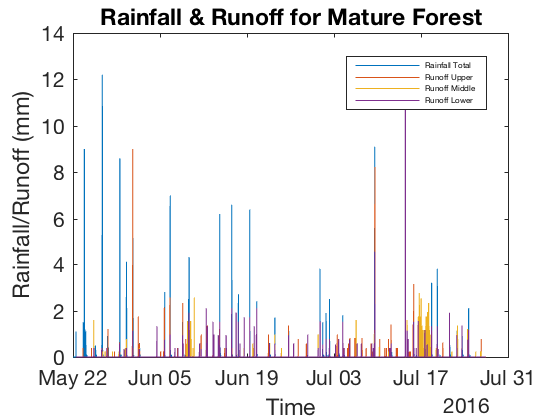

[Warning: Ignoring extra legend entries.] 
[> In legend>set_children_and_strings (line 658)
  In legend>make_legend (line 334)
  In legend (line 282)
  In pymat_eval (line 31)
  In matlabserver (line 24)]


In [16]:
%% Plot Forest Whole Summer
% Forest Rainfall vs. Forest Upper Runoff, Middle Runoff Totals
% Rain Gauge
plot(tenminutetime_MAT, tenminutetotal_MAT);
hold on 
% Runoff
% Upper
plot(allLL.forUpLL.timeStamp, allLL.forUpLL.heightMM)
% Middle 
plot(allLL.forMidLL.timeStamp, allLL.forMidLL.heightMM)
% Lower
plot(allLL.forLowLL.timeStamp, allLL.forLowLL.heightMM);
AX = legend('Rainfall Total','Runoff Upper', 'Runoff Middle','Runoff Lower', 'northwest');
set(AX,'FontSize',4);
title('Rainfall & Runoff for Mature Forest');
ylabel('Rainfall/Runoff (mm)');
xlabel('Time');

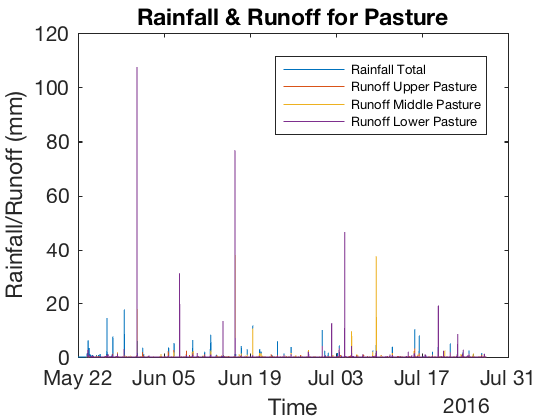

[Warning: Ignoring extra legend entries.] 
[> In legend>set_children_and_strings (line 658)
  In legend>make_legend (line 334)
  In legend (line 282)
  In pymat_eval (line 31)
  In matlabserver (line 24)]


In [21]:
% Pasture 
%% Plot Pasture Whole Summer
% Rain Gauge (Precip)
figure
plot(tenminutetime_PAS, tenminutetotal_PAS);
hold on
% Upper
plot(allLL.pasUpLL.timeStamp, allLL.pasUpLL.heightMM)
% Middle 
plot(allLL.pasMidLL.timeStamp, allLL.pasMidLL.heightMM)
% Lower
plot(allLL.pasLowLL.timeStamp, allLL.pasLowLL.heightMM);
 
AX = legend('Rainfall Total','Runoff Upper Pasture', 'Runoff Middle Pasture','Runoff Lower Pasture', 'northwest');
set(AX,'FontSize',6);
title('Rainfall & Runoff for Pasture')
ylabel('Rainfall/Runoff (mm)')
xlabel('Time')

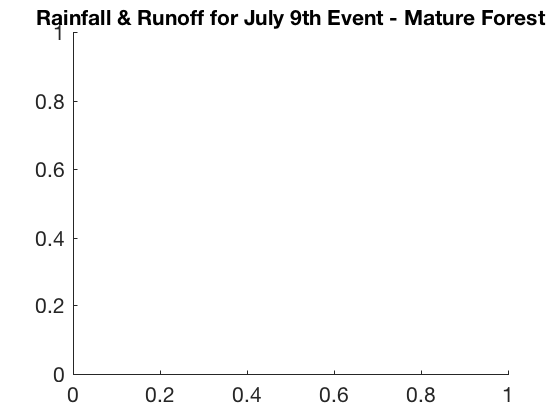

[Warning: There is no axes with which to associate a legend.] 
[> In legend (line 204)
  In pymat_eval (line 31)
  In matlabserver (line 24)]


In [49]:
%% Plot single event on July 9, 2016 - Forest (GOOD)
testStart = datetime('9-Jul-2016 11:00:00');
testEnd= datetime('9-Jul-2016 14:45:00');
dates = [testStart testEnd];
AX = legend('Rainfall Total','Runoff Upper', 'Runoff Middle', 'Runoff Lower');
set(AX,'FontSize',6);
title('Rainfall & Runoff for July 9th Event - Mature Forest', 'fontsize',10);
timeValPairs = {{tenminutetime_MAT, tenminutetotal_MAT}, 
                {allLL.forUpLL.timeStamp, allLL.forUpLL.heightMM}, 
                {allLL.forMidLL.timeStamp, allLL.forMidLL.heightMM},
                {allLL.forLowLL.timeStamp, allLL.forLowLL.heightMM}};

In [ ]:
% Runoff Ratio for this event: 
jul9ForestRR = PlotRainfallEvent(dates, legendStrings, plotTitle, timeValPairs)

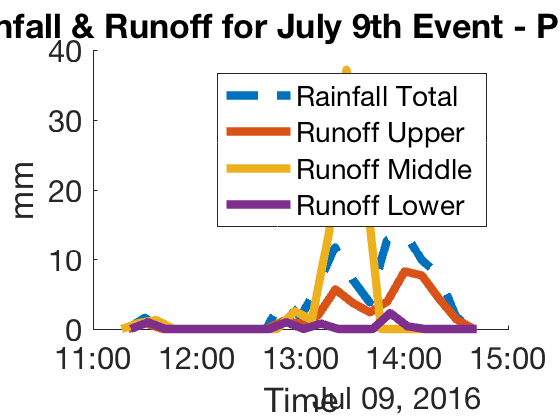

jul9PastureRR =

    0.5150


In [23]:
%% Plot single event on July 9, 2016 - Pasture with PlotRainfallEvents
testStart = datetime('9-Jul-2016 11:15:00');
testEnd= datetime('9-Jul-2016 14:45:00');
dates = [testStart testEnd];
legendStrings = {'Rainfall Total','Runoff Upper', 'Runoff Middle', 'Runoff Lower'};
plotTitle = 'Rainfall & Runoff for July 9th Event - Pasture';
timeValPairs = {{tenminutetime_PAS, tenminutetotal_PAS}, 
                {allLL.pasUpLL.timeStamp, allLL.pasUpLL.heightMM}, 
                {allLL.pasMidLL.timeStamp, allLL.pasMidLL.heightMM},
                {allLL.pasLowLL.timeStamp, allLL.pasLowLL.heightMM}};
 
jul9PastureRR = PlotRainfallEvent(dates, legendStrings, plotTitle, timeValPairs)

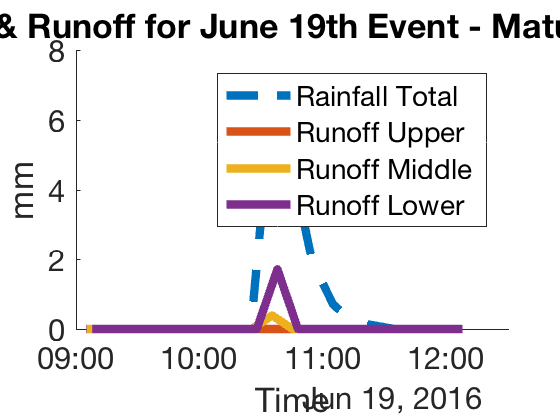

jun19ForestRR =

    0.0499


In [24]:
%% Plot single event on June 19th - Forest
testStart = datetime('19-Jun-2016 9:00:00');
testEnd= datetime('19-Jun-2016 12:15:00');
dates = [testStart testEnd];
legendStrings = {'Rainfall Total','Runoff Upper', 'Runoff Middle', 'Runoff Lower'};
plotTitle = 'Rainfall & Runoff for June 19th Event - Mature Forest';
timeValPairs = {{tenminutetime_MAT, tenminutetotal_MAT}, 
                {allLL.forUpLL.timeStamp, allLL.forUpLL.heightMM}, 
                {allLL.forMidLL.timeStamp, allLL.forMidLL.heightMM},
                {allLL.forLowLL.timeStamp, allLL.forLowLL.heightMM}};
 
jun19ForestRR = PlotRainfallEvent(dates, legendStrings, plotTitle, timeValPairs)


In [47]:
%% Plot single event on Jun 19th - PAS
jun19Start = datetime('19-Jun-2016 9:00:00');
jun19End= datetime('19-Jun-2016 12:15:00');
dates = [jun19Start jun19End];
legendStrings = {'Rainfall Total','Runoff Upper', 'Runoff Middle', 'Runoff Lower'};
title('Rainfall & Runoff for June 19th Event - Pasture', 'fontsize',5);
timeValPairs = {{tenminutetime_PAS, tenminutetotal_PAS}, 
                {allLL.pasUpLL.timeStamp, allLL.pasUpLL.heightMM}, 
                {allLL.pasMidLL.timeStamp, allLL.pasMidLL.heightMM},
                {allLL.pasLowLL.timeStamp, allLL.pasLowLL.heightMM}};

Index exceeds matrix dimensions.


In [ ]:
% Runoff Ratio for this event:
jun19PastureRR = PlotRainfallEvent(dates, legendStrings, plotTitle, timeValPairs)

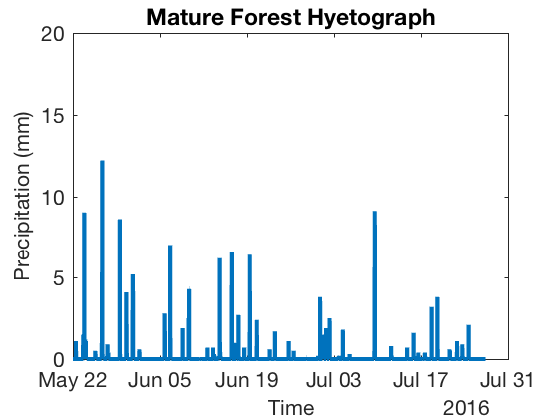

In [41]:
%% Plot Hyetograph for Forest
figure
plot(tenminutetime_MAT, tenminutetotal_MAT, 'linewidth',2);
title('Mature Forest Hyetograph', 'fontsize', 10);
set(gca,'FontSize',10);
xlhand = get(gca,'xlabel');
set(xlhand,'string','Time','fontsize',10);
yhand = get(gca,'ylabel');
set(yhand,'string','Precipitation (mm)','fontsize',10);
ylim([0 20]);

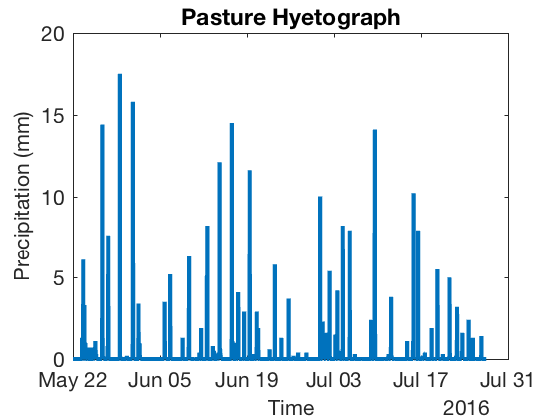

In [40]:
%% Plot Hyetograph for Pasture
figure
plot(tenminutetime_PAS, tenminutetotal_PAS, 'LineWidth', 2);
title('Pasture Hyetograph', 'FontSize',10);
set(gca,'FontSize',10);
xlhand = get(gca,'xlabel');
set(xlhand,'string','Time','fontsize',10);
yhand = get(gca,'ylabel');
set(yhand,'string','Precipitation (mm)','fontsize',10);
ylim([0 20]);

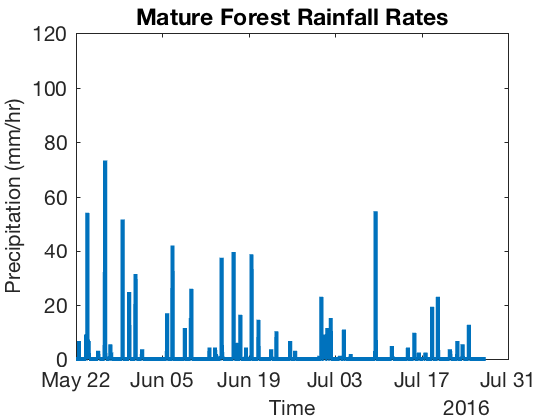

In [39]:
%% Plot Rainfall Rates for Forest
figure
plot(tenminutetime_MAT, tenminuterate_MAT, 'LineWidth', 2);
title('Mature Forest Rainfall Rates', 'FontSize', 20);
set(gca,'FontSize',10);
xlhand = get(gca,'xlabel');
set(xlhand,'string','Time','fontsize',10);
yhand = get(gca,'ylabel');
set(yhand,'string','Precipitation (mm/hr)','fontsize',10);
ylim([0 120]);

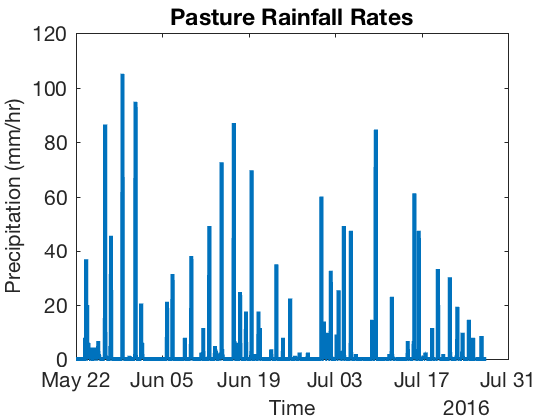

In [38]:
%% Plot Rainfall Rates for Pasture
figure
plot(tenminutetime_PAS, tenminuterate_PAS,'LineWidth',2);
title('Pasture Rainfall Rates', 'FontSize', 10);
set(gca,'FontSize',10);
xlhand = get(gca,'xlabel');
set(xlhand,'string','Time','fontsize',10);
yhand = get(gca,'ylabel');
set(yhand,'string','Precipitation (mm/hr)','fontsize',10);
ylim([0 120]);

While these figures are useful because I can zoom in to certain rain events in MATLAB, they aren't great for data visualization. A more typical way to visualize rainfall and runoff data is by displaying the precip data on the upper x axis, and runoff on the lower x axis. 

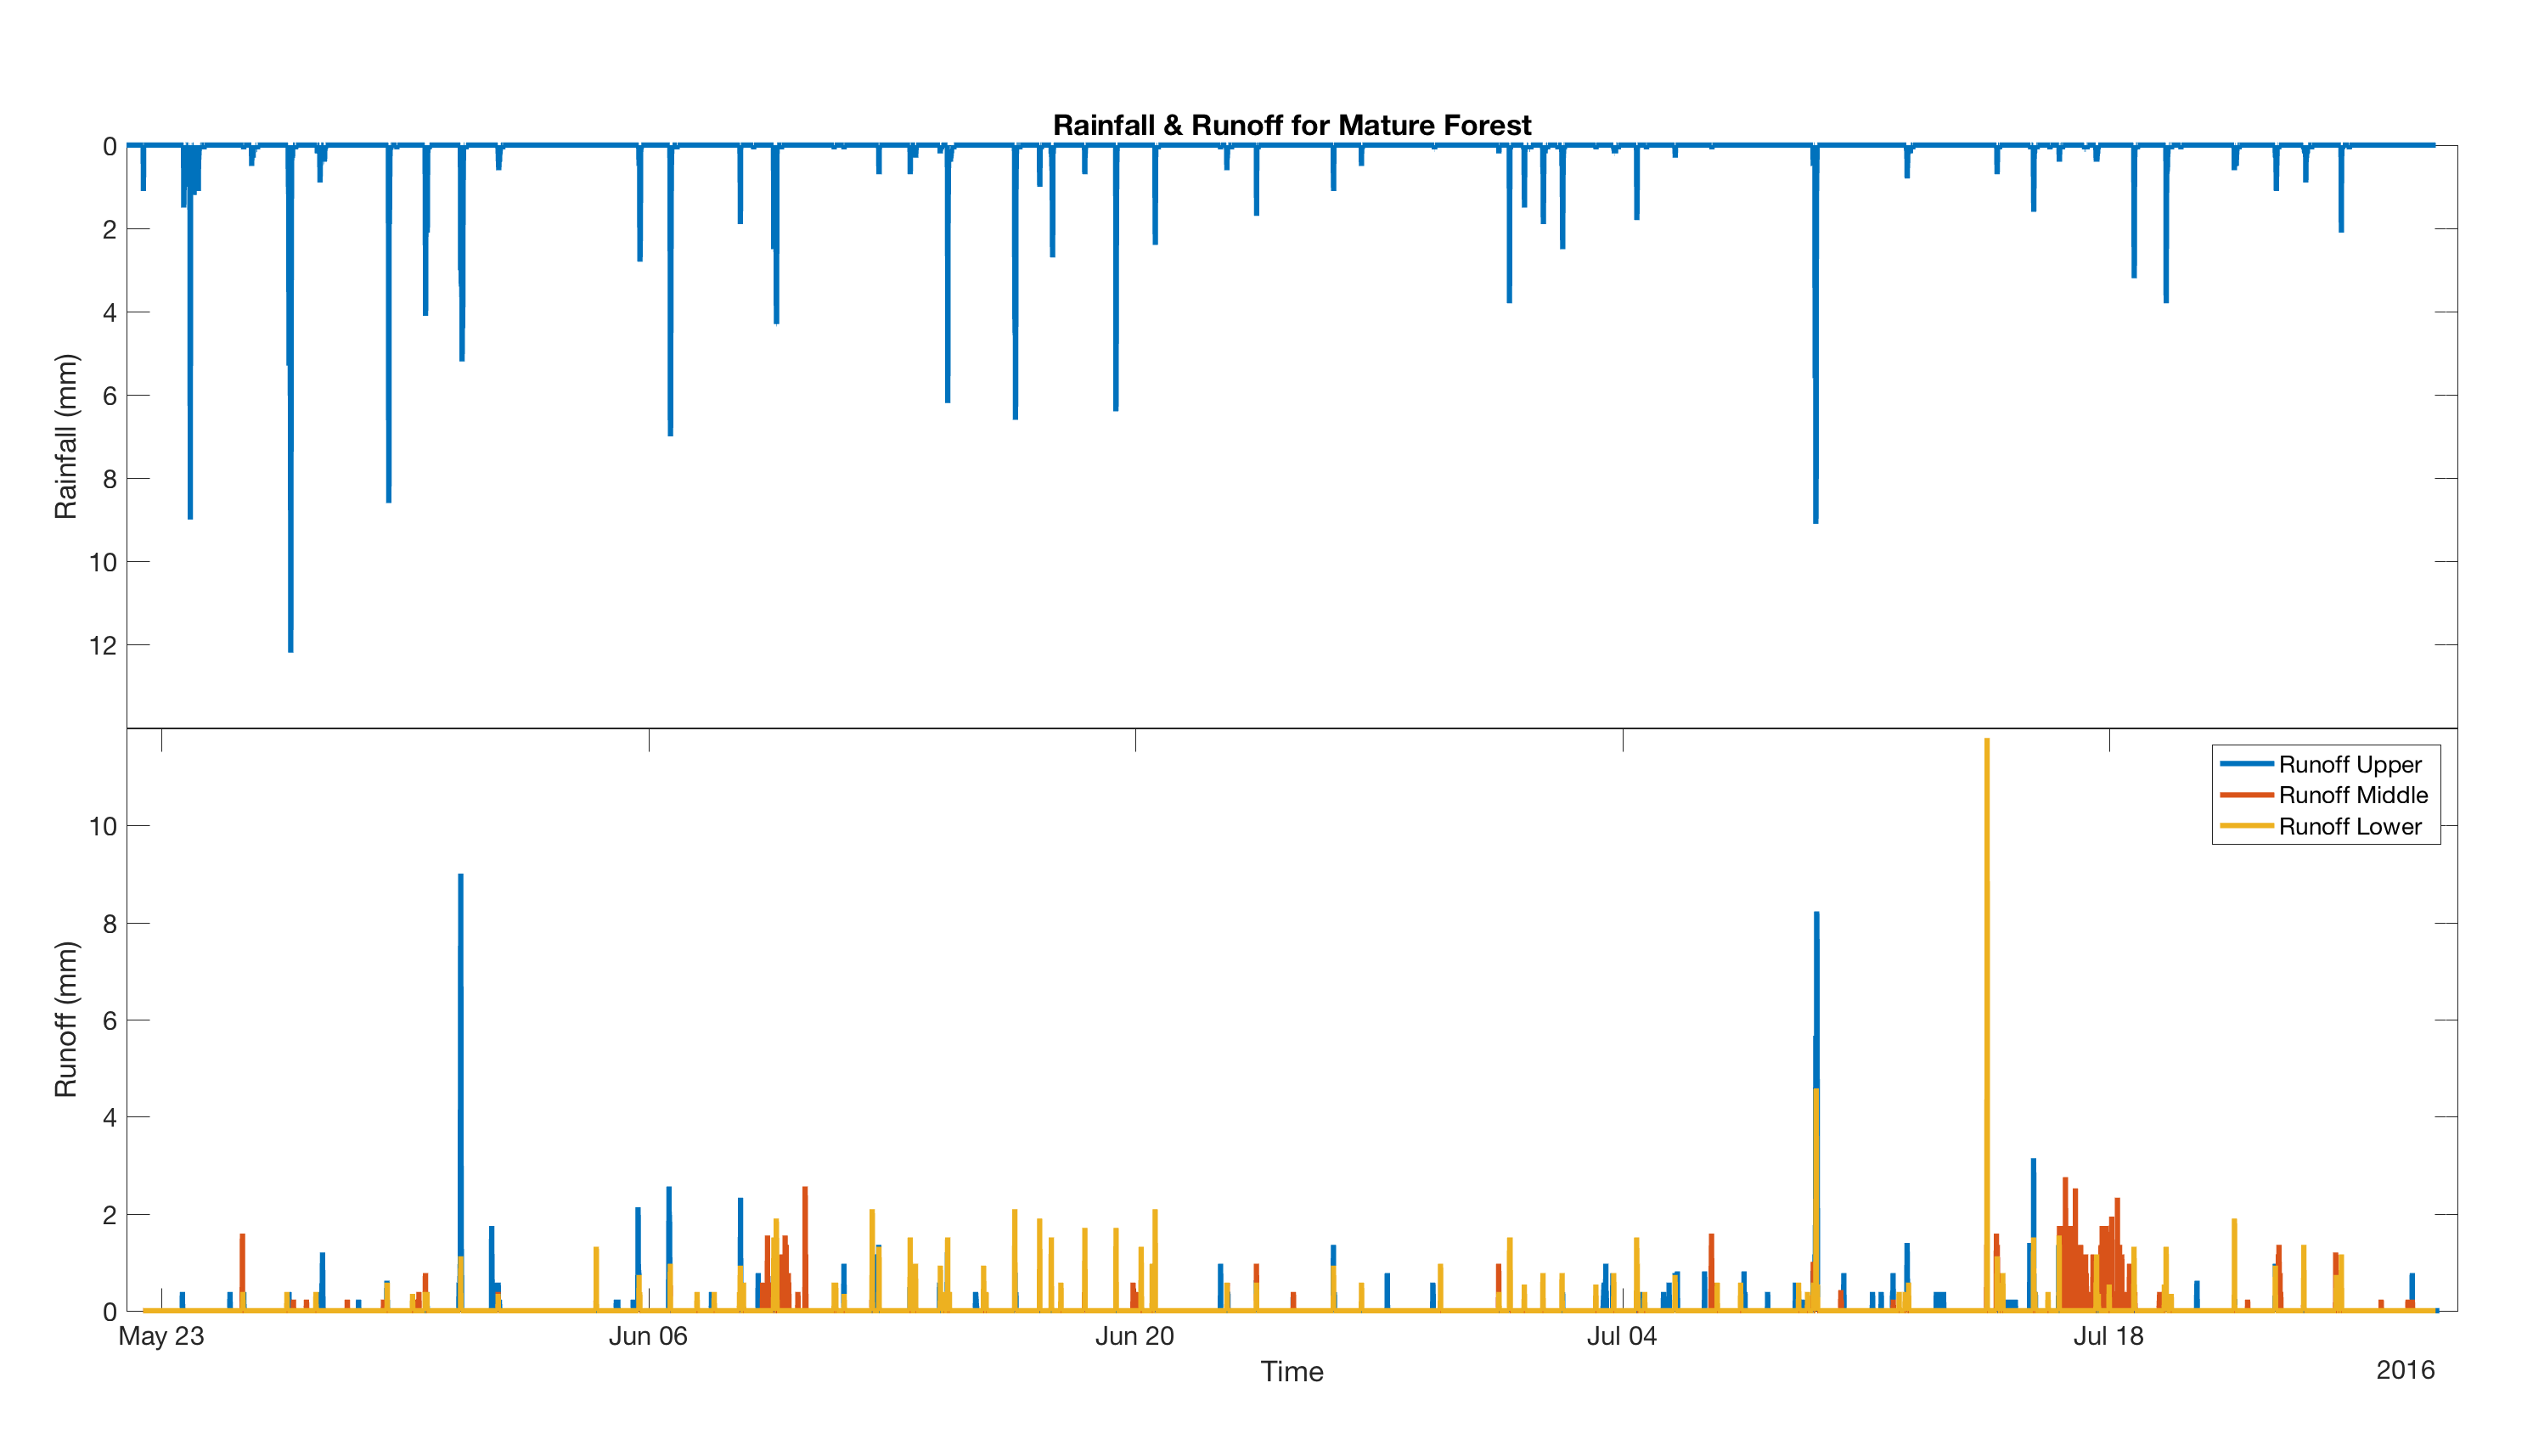

In [33]:
%% Double Plot of Precip and Runoff for Forest Summer 2016
width= 0.92;
height= 0.4;
leftcorner=0.05;
bottomcorner1=0.5;
bottomcorner2=bottomcorner1-height;
linewidth = 3;
titleFontSize = 20;
axisFontSize = 15;
 
figure('units','normalized','outerposition',[0 0 1 1])
clf
 
%This is the first part of the subplot - precip
ax(1)= axes('position',[leftcorner bottomcorner1 width height]);
plot(tenminutetime_MAT, tenminutetotal_MAT, 'LineWidth', linewidth);
currentYTicks = get(gca, 'YTick');
% Remove the last tick that would overlap with the bottom graph tick
set(gca, 'YTick', currentYTicks(1:end-1));
set(gca,'ydir','reverse');
linkaxes(ax,'x');
% xlim([736470 736540]);
xlim(datetime(2016,[5 7],[22 28]))
%beginTime='22/05/2016 00:00:00';
%endTime= '28/07/2016 00:00:00';
%set(gca, 'XLim', [22/05/2016 00:00:00 28/07/2016 00:00:00]);
ylabel('Rainfall (mm)')
title('Rainfall & Runoff for Mature Forest', 'FontSize', titleFontSize)
set(gca,'xtick',[])
set(gca, 'xticklabel',[])
set(gca,'FontSize',axisFontSize)
 
% This is the second part of the subplot - runoff
ax(2)= axes('position',[leftcorner bottomcorner2 width height]);
% Upper
plot(allLL.forUpLL.timeStamp, allLL.forUpLL.heightMM, 'LineWidth', linewidth)
hold on
% Middle 
plot(allLL.forMidLL.timeStamp, allLL.forMidLL.heightMM, 'LineWidth', linewidth)
% Lower
plot(allLL.forLowLL.timeStamp, allLL.forLowLL.heightMM, 'LineWidth', linewidth);
linkaxes(ax,'x');
% xlim([736470 736540]);
xlim(datetime(2016,[5 7],[22 28]))
currentYTicks = get(gca, 'YTick');
% Remove the last tick that would overlap with the top graph tick
set(gca, 'YTick', currentYTicks(1:end-1));
set(gca,'FontSize',axisFontSize)
 
%set(gca, 'XLim', [22/05/2016 00:00:00 28/07/2016 00:00:00]);
legend('Runoff Upper', 'Runoff Middle','Runoff Lower')
ylabel('Runoff (mm)')
xlabel('Time')


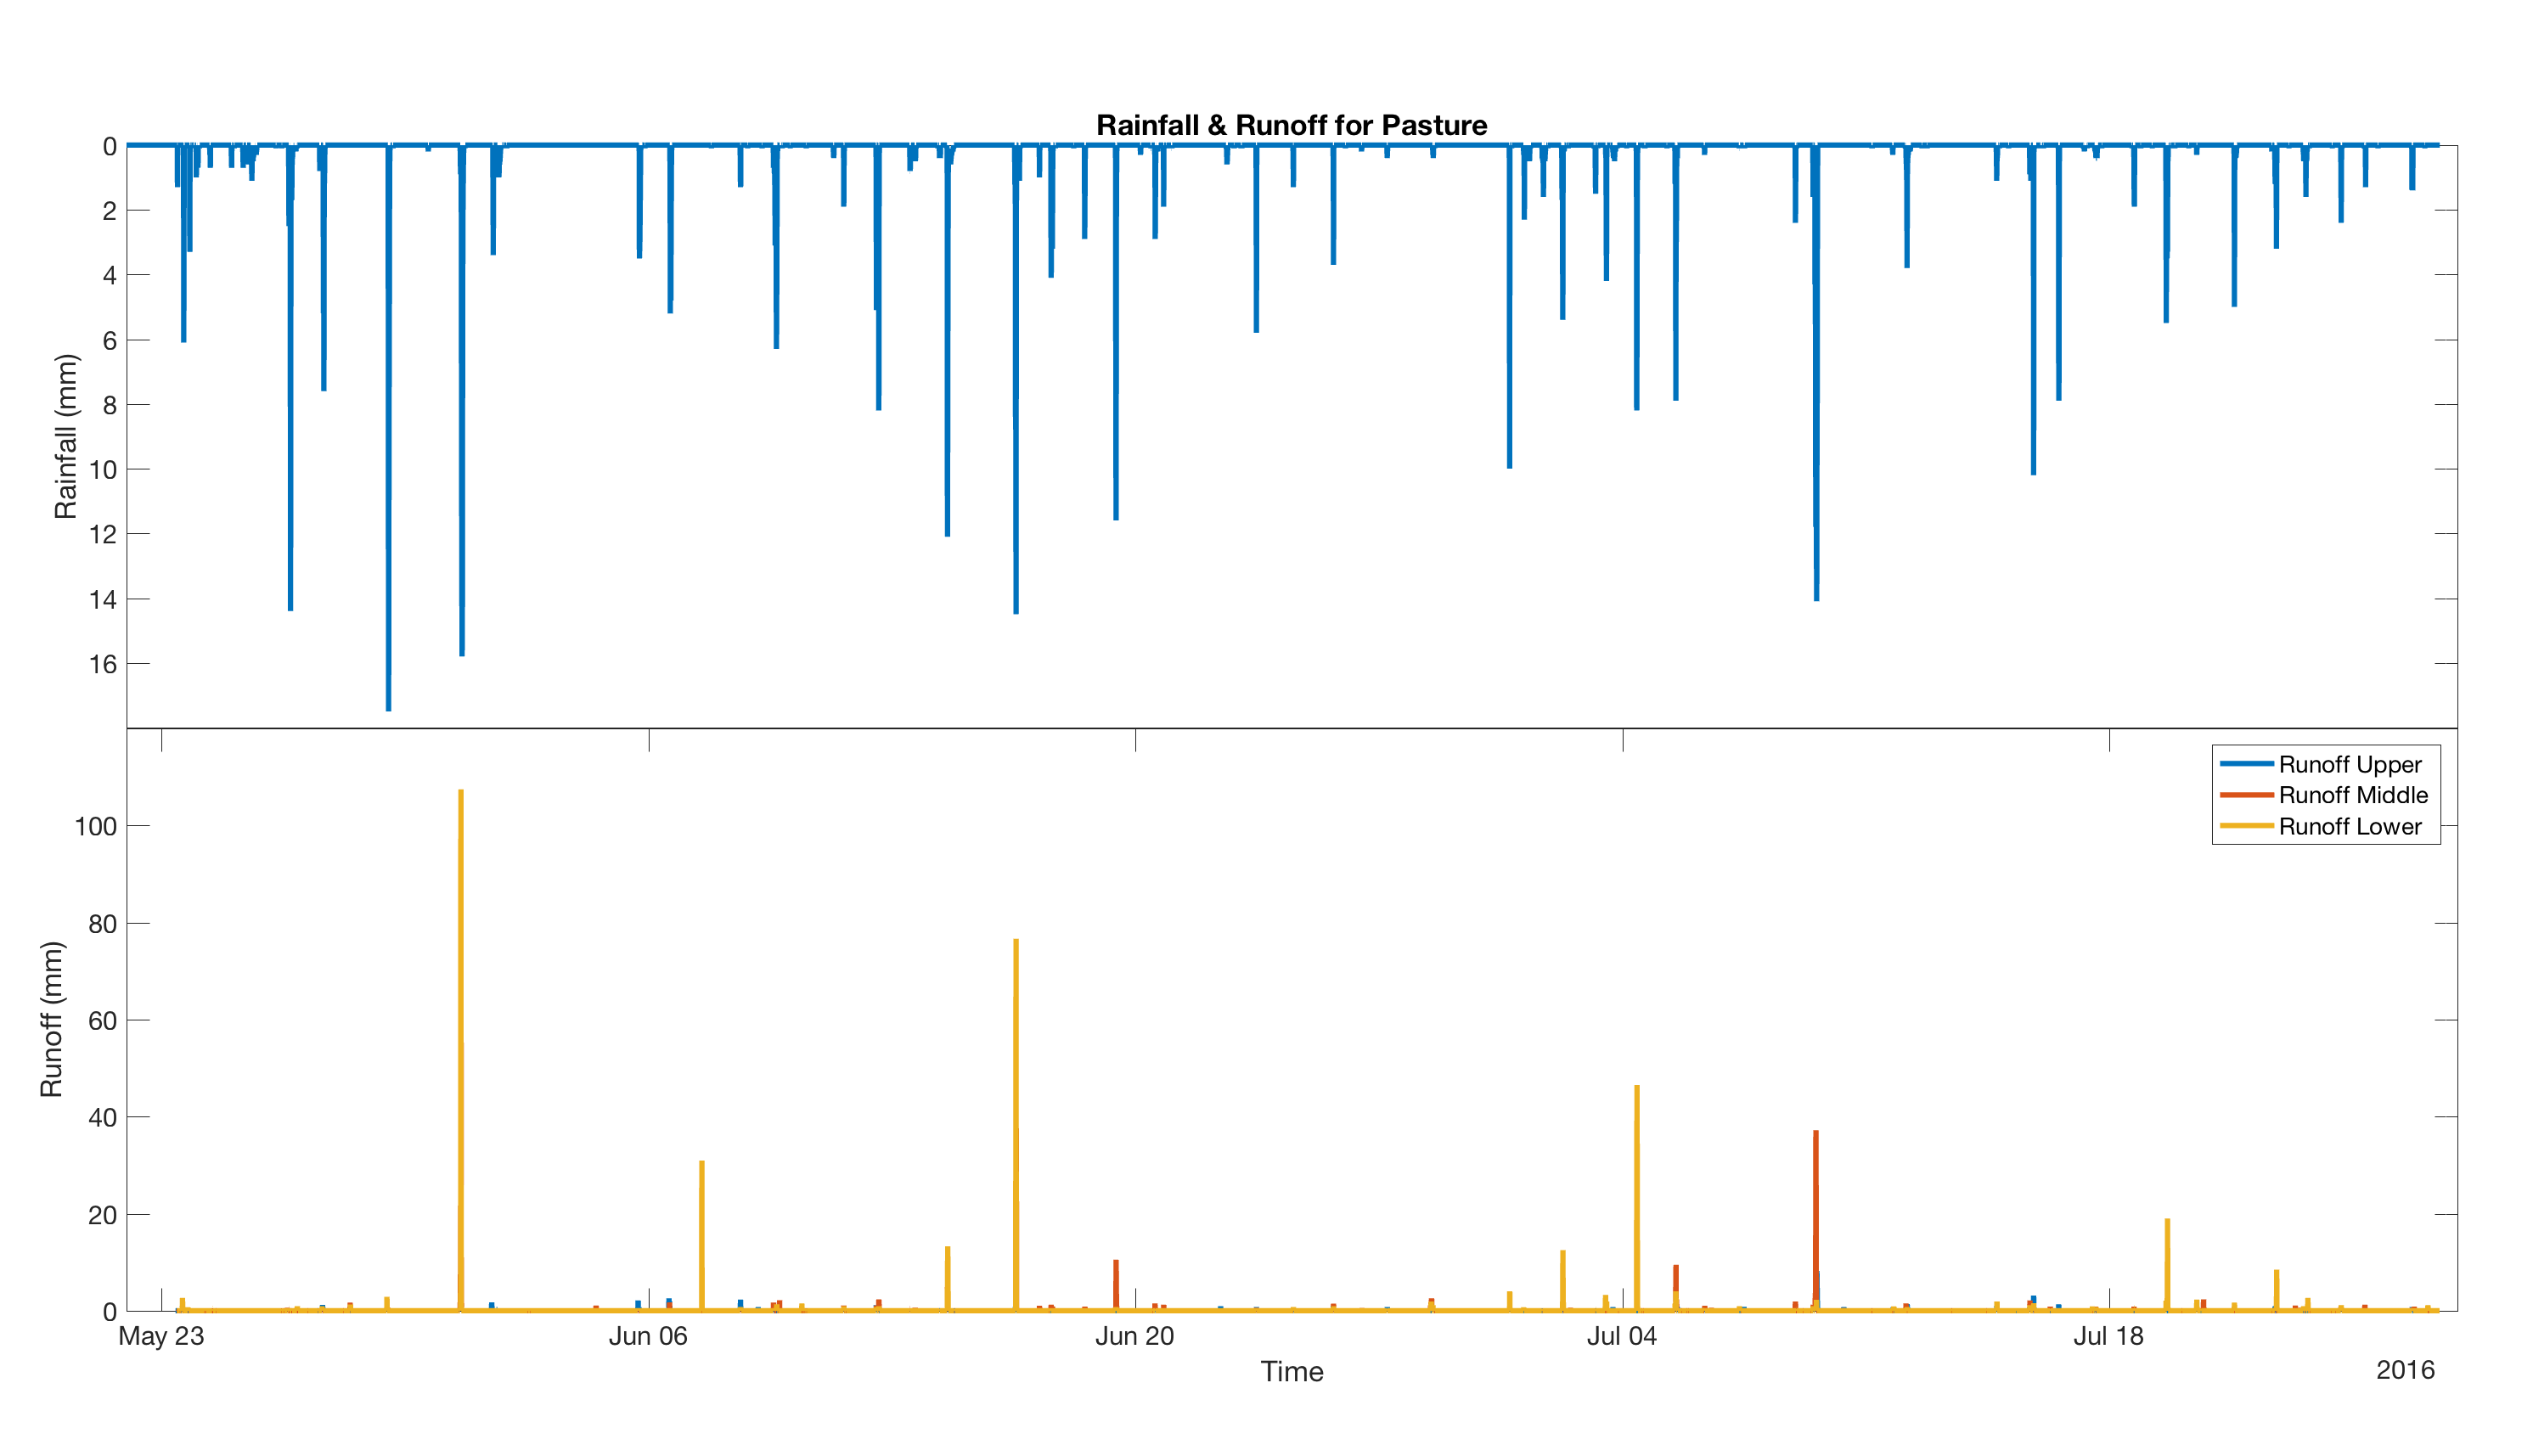

[Warning: Excluding ColorBars, Legends and non-axes] 
[> In linkaxes (line 66)
  In pymat_eval (line 31)
  In matlabserver (line 24)]


In [35]:
%% Double Plot Pasture Whole Summer
 
width= 0.92;
height= 0.4;
leftcorner=0.05;
bottomcorner1=0.5;
bottomcorner2=bottomcorner1-height;
linewidth = 3;
titleFontSize = 20;
axisFontSize = 15;
 
figure('units','normalized','outerposition',[0 0 1 1])
clf
 
%This is the first part of the subplot - precip
ax(1)= axes('position',[leftcorner bottomcorner1 width height]);
plot(tenminutetime_PAS, tenminutetotal_PAS, 'LineWidth', linewidth);
currentYTicks = get(gca, 'YTick');
% Remove the last tick that would overlap with the bottom graph tick
set(gca, 'YTick', currentYTicks(1:end-1));
set(gca,'ydir','reverse');
linkaxes(ax,'x');
% xlim([736470 736540]);
xlim(datetime(2016,[5 7],[22 28]));
%beginTime='22/05/2016 00:00:00';
%endTime= '28/07/2016 00:00:00';
%set(gca, 'XLim', [22/05/2016 00:00:00 28/07/2016 00:00:00]);
ylabel('Rainfall (mm)')
title('Rainfall & Runoff for Pasture', 'FontSize', titleFontSize);
set(gca,'xtick',[]);
set(gca, 'xticklabel',[]);
set(gca,'FontSize',axisFontSize);
 
 
% This is the second part of the subplot - runoff
ax(2)= axes('position',[leftcorner bottomcorner2 width height]);
% Upper
plot(allLL.pasUpLL.timeStamp, allLL.pasUpLL.heightMM, 'LineWidth', linewidth);
hold on;
% Middle 
plot(allLL.pasMidLL.timeStamp, allLL.pasMidLL.heightMM, 'LineWidth', linewidth)
% Lower
plot(allLL.pasLowLL.timeStamp, allLL.pasLowLL.heightMM, 'LineWidth', linewidth);
 
linkaxes(ax,'x');
% xlim([736470 736540]);
xlim(datetime(2016,[5 7],[22 28]));
currentYTicks = get(gca, 'YTick');
% Remove the last tick that would overlap with the top graph tick
set(gca, 'YTick', currentYTicks(1:end-1));
%set(gca, 'XLim', [22/05/2016 00:00:00 28/07/2016 00:00:00]);
set(gca,'FontSize',axisFontSize);
legend('Runoff Upper', 'Runoff Middle','Runoff Lower');
ylabel('Runoff (mm)');
xlabel('Time');

Finally, add animation to this plot so I can visualize how rainfall and runoff vary over time. I couldn't figure this out in MATLAB so this can be found in a separate Notebook: 

Link to [Data Animation](Data Animation.ipynb)

## Results

In [36]:
%% Calculate Whole Summer Forest Runoff Ratios 
% Forest Upper - Whole Summer
totalforuprunoff= sum(allLL.forUpLL.heightMM);
totalforupprecip= sum(tenminutetotal_MAT);
foruprunoffcoeff= totalforuprunoff/totalforupprecip;
disp(['forest upper runoff coefficient - whole summer: ' num2str(foruprunoffcoeff)]);
 
% Forest Middle - Whole Summer
totalformidrunoff= sum(allLL.forMidLL.heightMM);
totalformidprecip= sum(tenminutetotal_MAT);
formidrunoffcoeff= totalformidrunoff/totalformidprecip;
disp(['forest middle runoff coefficient - whole summer: ' num2str(formidrunoffcoeff)]);
 
% Forest Lower - Whole Summer
totalforlowrunoff= sum(allLL.forLowLL.heightMM);
totalforlowprecip= sum(tenminutetotal_MAT);
forlowrunoffcoeff= totalforlowrunoff/totalforlowprecip;
disp(['forest middle runoff coefficient - whole summer: ' num2str(forlowrunoffcoeff)]);
 
% Forest Average Runoff Ratio- whole summer
forRunoffAverage = mean([totalforuprunoff, totalformidrunoff, totalforlowrunoff]);
allSummerForestRatio = forRunoffAverage/sum(tenminutetotal_MAT);
disp(['Forest runoff coefficient for whole summer (average of site runoffs): ' num2str(allSummerForestRatio)]);

forest upper runoff coefficient - whole summer: 0.38066
forest middle runoff coefficient - whole summer: 0.29171
forest middle runoff coefficient - whole summer: 0.27289
Forest runoff coefficient for whole summer (average of site runoffs): 0.31509


In [37]:
%% Calculate Whole Summer Pasture Runoff Ratios 
% Pasture Upper - Whole Summer
totalpasuprunoff= sum(allLL.pasUpLL.heightMM);
totalpasupprecip= sum(tenminutetotal_PAS);
pasuprunoffcoeff= totalpasuprunoff/totalpasupprecip;
disp(['Pasture upper runoff coefficient - whole summer: ' num2str(pasuprunoffcoeff)]);
 
% Pasture Middle - Whole Summer
totalpasmidrunoff= sum(allLL.pasMidLL.heightMM);
totalpasmidprecip= sum(tenminutetotal_PAS);
pasmidrunoffcoeff= totalpasmidrunoff/totalpasmidprecip;
disp(['Pasture middle runoff coefficient - whole summer: ' num2str(pasmidrunoffcoeff)]);
 
% Pasture Lower - Whole Summer
totalpaslowrunoff= sum(allLL.pasLowLL.heightMM);
totalpaslowprecip= sum(tenminutetotal_PAS);
paslowrunoffcoeff= totalpaslowrunoff/totalpaslowprecip;
disp(['Pasture middle runoff coefficient - whole summer: ' num2str(paslowrunoffcoeff)]);
 
% Pasture Average Runoff Ratio- whole summer
pasRunoffAverage = mean([totalpasuprunoff, totalpasmidrunoff, totalpaslowrunoff]);
allSummerPastureRatio = pasRunoffAverage/sum(tenminutetotal_PAS);
disp(['Pasture runoff coefficient for whole summer (average of site runoffs): ' num2str(allSummerPastureRatio)]);

Pasture upper runoff coefficient - whole summer: 0.20035
Pasture middle runoff coefficient - whole summer: 0.63702
Pasture middle runoff coefficient - whole summer: 0.70842
Pasture runoff coefficient for whole summer (average of site runoffs): 0.51526


#### Statistics 

## Discussion

## Conclusions 

Talk about what I've found so far

#### Future Work
While this is a good start, there is still work to be done. First, as seen in the visuals above, there are several wonky rainfall events where more runoff volume is recorded than precipitation volume, or runoff occurs before the precipitation event even starts. In other cases, the tipping buckets recording runoff are overwhelmed by the high volumes of water running off of the plot on the ground surface and do not accurately reflect runoff. Other times, there are rain events that begin when the 5 gallon bucket housing the level logger is empty - through some lab testing, I found that the level loggers cannot accurately quantify a rate of change of water level when less than 4L of water is in the bucket (kind of a lot of water!). So, these things need to be considered when determining my "ideal" storms for final analysis. I also need to be able to validate my selection of rain events - why can some storms be thrown out of my dataset, but others can be trusted as accurate. 

#### Some conclusions about the MATLAB Kernel for Jupyter notebooks: 
1. It was useful to be able to import and run full scripts into Jupyter without bogging down the notebook with script. 2. I also liked the feature where I could load the full scripts if I wanted to show/explain what was done.
3. Though there is likely a work around for this, it's frustrating that I cannot have MATLAB open to edit my scripts while also running Jupyter. 
4. It was a little difficult to figure out how to do things (like the animation and displaying images) in the Jupyter Notebook specific to the MATLAB Kernel - doesn't seem like many people are using Matlab with Jupyter.  

### References

[1] Ogden, F. L., Crouch, T. D., Stallard, R. F., Hall, J. S. 2013. Effect of land cover and use on dry
season river runoff, runoff efficiency, and peak storm runoff in the seasonal tropics of Central Panama. Water Res.
Research, 49(12), 8443–8462. 

[2] Salin, D. L. 2010. Impact of Panama Canal Expansion on the U.S. Intermodal
System, (January). 

[3] Wetzel, R. G., Hatcher, P. G., Bianchi, T. S. 1995. Natural photolysis by ultraviolet irradiance
of recalcitrant dissolved organic matter to simple substrates for rapid bacterial metabolism. Limnology and
Oceanography, 40(8), 1369–1380. 

[4] Zimmermann, B., Zimmermann, A., Turner, B. L., Francke, T., Elsenbeer, H.
2014.Connectivity of overland flow by drainage network expansion in a rain forest catchment. Water Res.
Research, 2108–2123.